In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
df=pd.read_csv("TaxiFare.csv")

In [3]:
plt.style.use('bmh')

In [4]:
sns.set_style({'axes.grid':False})

In [5]:
dtypes = {}
for key in ['amount', 'pickup_longitude', 'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude']:
    dtypes[key] = 'float32'
for key in ['passenger_count']:
    dtypes[key] = 'uint8'

In [6]:
display(df.dtypes)

unique_id                object
amount                  float64
date_time_of_pickup      object
longitude_of_pickup     float64
latitude_of_pickup      float64
longitude_of_dropoff    float64
latitude_of_dropoff     float64
no_of_passenger           int64
dtype: object

In [7]:
df['date_time_of_pickup'] = pd.to_datetime(df['date_time_of_pickup'], infer_datetime_format=True)


C:\Users\anshu\AppData\Local\Temp\ipykernel_5444\3463491492.py:1: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  df['date_time_of_pickup'] = pd.to_datetime(df['date_time_of_pickup'], infer_datetime_format=True)


In [8]:
df.head()

,unique_id,amount,date_time_of_pickup,longitude_of_pickup,latitude_of_pickup,longitude_of_dropoff,latitude_of_dropoff,no_of_passenger
0,26:21.0,4.5,2009-06-15 17:26:21+00:00,-73.844311,40.721319,-73.841610,40.712278,1
1,52:16.0,16.9,2010-01-05 16:52:16+00:00,-74.016048,40.711303,-73.979268,40.782004,1
2,35:00.0,5.7,2011-08-18 00:35:00+00:00,-73.982738,40.761270,-73.991242,40.750562,2
3,30:42.0,7.7,2012-04-21 04:30:42+00:00,-73.987130,40.733143,-73.991567,40.758092,1
4,51:00.0,5.3,2010-03-09 07:51:00+00:00,-73.968095,40.768008,-73.956655,40.783762,1


In [9]:
display(np.round(df.memory_usage(deep = True)/1024**2, 4))

Index                   0.0001
unique_id               3.0518
amount                  0.3815
date_time_of_pickup     0.3815
longitude_of_pickup     0.3815
latitude_of_pickup      0.3815
longitude_of_dropoff    0.3815
latitude_of_dropoff     0.3815
no_of_passenger         0.3815
dtype: float64

In [10]:
display(df.head())

,unique_id,amount,date_time_of_pickup,longitude_of_pickup,latitude_of_pickup,longitude_of_dropoff,latitude_of_dropoff,no_of_passenger
0,26:21.0,4.5,2009-06-15 17:26:21+00:00,-73.844311,40.721319,-73.841610,40.712278,1
1,52:16.0,16.9,2010-01-05 16:52:16+00:00,-74.016048,40.711303,-73.979268,40.782004,1
2,35:00.0,5.7,2011-08-18 00:35:00+00:00,-73.982738,40.761270,-73.991242,40.750562,2
3,30:42.0,7.7,2012-04-21 04:30:42+00:00,-73.987130,40.733143,-73.991567,40.758092,1
4,51:00.0,5.3,2010-03-09 07:51:00+00:00,-73.968095,40.768008,-73.956655,40.783762,1


In [11]:
# Missing values in train data
print('Missing values in train data:')
display(df.isna().sum())

Missing values in train data:


unique_id               0
amount                  0
date_time_of_pickup     0
longitude_of_pickup     0
latitude_of_pickup      0
longitude_of_dropoff    0
latitude_of_dropoff     0
no_of_passenger         0
dtype: int64

C:\Users\anshu\AppData\Local\Temp\ipykernel_5444\1219446005.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df.amount, bins = 200, color = 'firebrick', ax = ax)


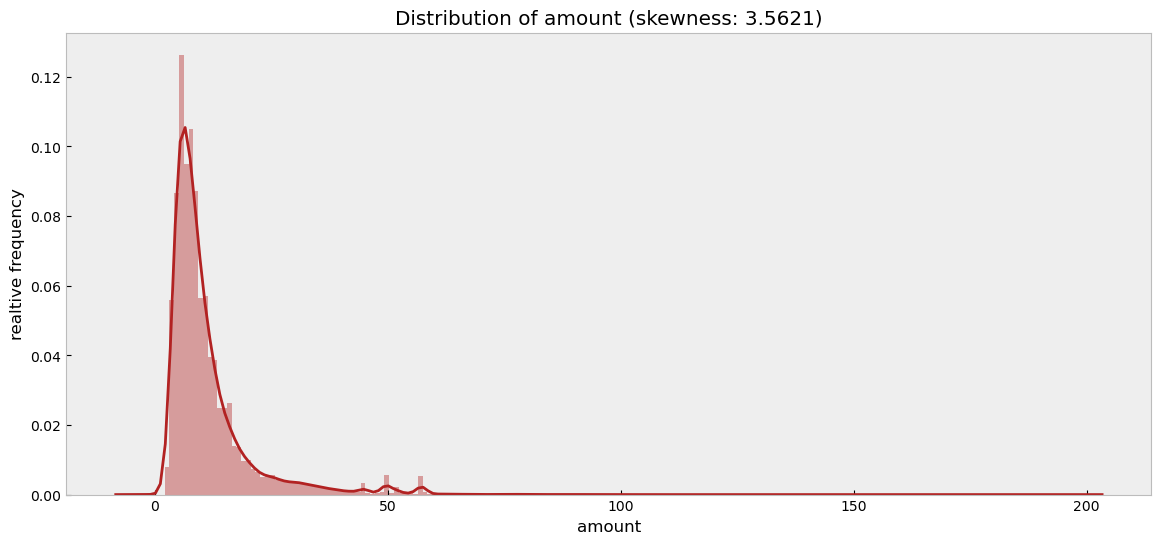

In [12]:
# Distrubution of target variable with skewness
fig, ax = plt.subplots(figsize = (14,6))
sns.distplot(df.amount, bins = 200, color = 'firebrick', ax = ax)
ax.set_title('Distribution of amount (skewness: {:0.5})'.format(df.amount.skew()))
ax.set_ylabel('realtive frequency')
plt.show()

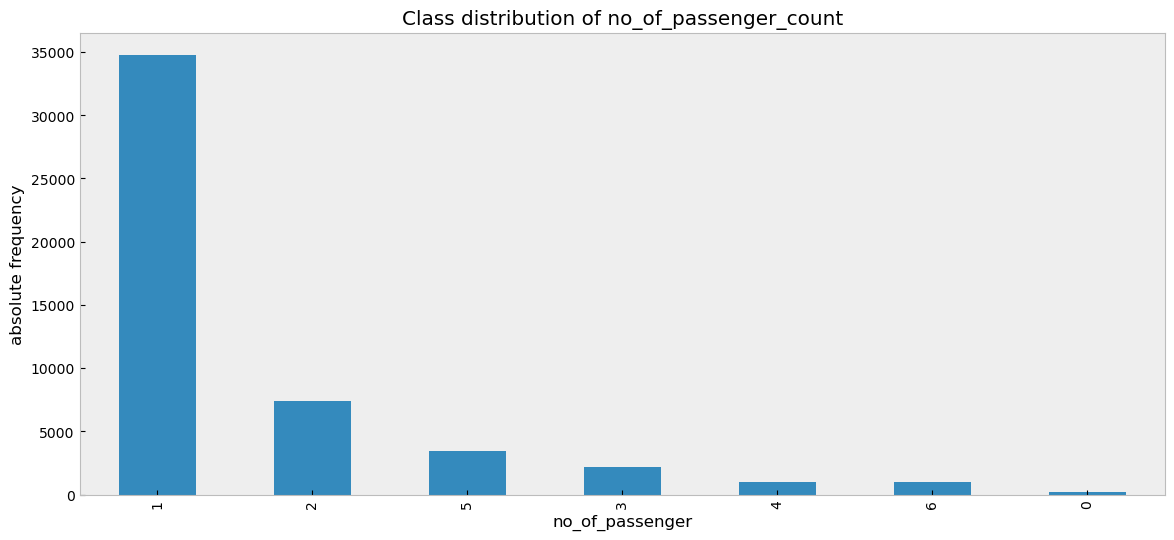

In [13]:
# Class distribution of passenger_count
fig, ax = plt.subplots(figsize = (14,6))
class_dist = df.no_of_passenger.value_counts()
class_dist.plot(kind = 'bar', ax = ax)
ax.set_title('Class distribution of no_of_passenger_count')
ax.set_ylabel('absolute frequency')
plt.show()

In [14]:
# Look at the abnormalities using descritive stats
df.amount.describe()

count    50000.000000
mean        11.364171
std          9.685557
min         -5.000000
25%          6.000000
50%          8.500000
75%         12.500000
max        200.000000
Name: amount, dtype: float64

In [15]:
# Drop fare_amount less than 0.
fare = df.loc[df.amount<0, :].index
df.drop(fare, axis = 0, inplace = True)

# Rerun the descriptive stats
df.amount.describe()

count    49994.000000
mean        11.365903
std          9.684843
min          0.000000
25%          6.000000
50%          8.500000
75%         12.500000
max        200.000000
Name: amount, dtype: float64

In [16]:
amount_to_drop = df.loc[(df.amount>100) | (df.amount<2.5), :].index
df.drop(amount_to_drop, axis = 0, inplace = True)
print('Shape of df data after dropping outliers from amount:{}'.format(df.shape))

Shape of df data after dropping outliers from amount:(49974, 8)


In [17]:
df.head()

,unique_id,amount,date_time_of_pickup,longitude_of_pickup,latitude_of_pickup,longitude_of_dropoff,latitude_of_dropoff,no_of_passenger
0,26:21.0,4.5,2009-06-15 17:26:21+00:00,-73.844311,40.721319,-73.841610,40.712278,1
1,52:16.0,16.9,2010-01-05 16:52:16+00:00,-74.016048,40.711303,-73.979268,40.782004,1
2,35:00.0,5.7,2011-08-18 00:35:00+00:00,-73.982738,40.761270,-73.991242,40.750562,2
3,30:42.0,7.7,2012-04-21 04:30:42+00:00,-73.987130,40.733143,-73.991567,40.758092,1
4,51:00.0,5.3,2010-03-09 07:51:00+00:00,-73.968095,40.768008,-73.956655,40.783762,1
